In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!git clone https://github.com/aritradas080/Malaria-Detection---KN.git
%cd Malaria-Detection---KN/Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Cloning into 'Malaria-Detection---KN'...
remote: Enumerating objects: 537, done.
remote: Counting objects: 100% (537/537), done.
remote: Compressing objects: 100% (536/536), done.
remote: Total 537 (delta 0), reused 537 (delta 0), pack-reused 0
Receiving objects: 100% (537/537), 5.83 MiB | 28.99 MiB/s, done.
/content/Malaria-Detection---KN/Dataset
Mounted at /content/drive


In [ ]:
#resizing of images
IMAGE_SIZE = [224, 224]

train_path = '/content/Malaria-Detection---KN/Dataset/Train';
test_path = '/content/Malaria-Detection---KN/Dataset/Test';

print(train_path)
print(test_path )

/content/Malaria-Detection---KN/Dataset/Train
/content/Malaria-Detection---KN/Dataset/Test


In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# don't train existing weights
for layer in vgg19.layers:
  layer.trainable = False;

In [ ]:
print(os.listdir(train_path))

['Parasite', 'Uninfected']


In [ ]:
# useful for getting number of output classes
folders = glob('/content/Malaria-Detection---KN/Dataset/Train/*')

In [ ]:
print(folders)

['/content/Malaria-Detection---KN/Dataset/Train/Parasite', '/content/Malaria-Detection---KN/Dataset/Train/Uninfected']


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Malaria-Detection---KN/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/Malaria-Detection---KN/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-6ec5a35725ca>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
13/13 [==============================] - 373s 29s/step - loss: 1.3153 - accuracy: 0.5409 - val_loss: 0.6209 - val_accuracy: 0.6642
Epoch 2/5
13/13 [==============================] - 367s 29s/step - loss: 0.5747 - accuracy: 0.6707 - val_loss: 0.6022 - val_accuracy: 0.6866
Epoch 3/5
13/13 [==============================] - 420s 33s/step - loss: 0.4385 - accuracy: 0.7837 - val_loss: 0.4975 - val_accuracy: 0.7164
Epoch 4/5
13/13 [==============================] - 422s 33s/step - loss: 0.3560 - accuracy: 0.8558 - val_loss: 0.5776 - val_accuracy: 0.6940
Epoch 5/5
13/13 [==============================] - 421s 33s/step - loss: 0.3001 - accuracy: 0.8654 - val_loss: 0.5633 - val_accuracy: 0.6791


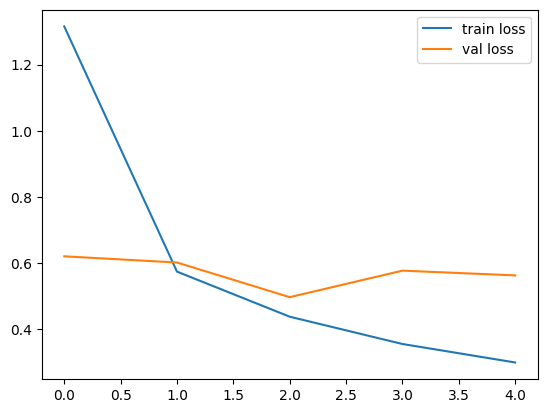

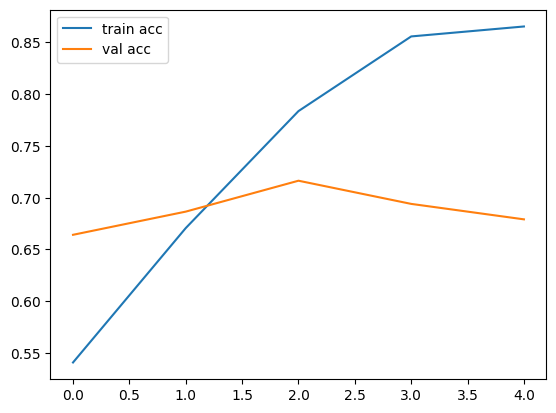

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

5/5 [==============================] - 88s 17s/step


In [ ]:
y_pred

array([[9.85327840e-01, 1.46721872e-02],
       [8.13236475e-01, 1.86763555e-01],
       [9.76552427e-01, 2.34476086e-02],
       [6.86126769e-01, 3.13873112e-01],
       [9.07940269e-01, 9.20597240e-02],
       [9.48520482e-01, 5.14794514e-02],
       [8.85134578e-01, 1.14865385e-01],
       [9.45562184e-01, 5.44376597e-02],
       [7.73297668e-01, 2.26702258e-01],
       [7.58649886e-01, 2.41350085e-01],
       [6.61447465e-01, 3.38552505e-01],
       [7.28934407e-01, 2.71065533e-01],
       [8.64680290e-01, 1.35319680e-01],
       [8.18610430e-01, 1.81389540e-01],
       [9.73623633e-01, 2.63763387e-02],
       [9.88289833e-01, 1.17101874e-02],
       [7.64921308e-01, 2.35078737e-01],
       [5.52462339e-01, 4.47537690e-01],
       [9.17088151e-01, 8.29118043e-02],
       [8.82305503e-01, 1.17694423e-01],
       [9.59877729e-01, 4.01222520e-02],
       [9.52033639e-01, 4.79663350e-02],
       [9.96090591e-01, 3.90924141e-03],
       [9.05366123e-01, 9.46338773e-02],
       [9.282727

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/Malaria-Detection---KN/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 1s 761ms/step


array([[0.00167505, 0.99832493]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 1s 606ms/step


In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
